###Aim
Encode a few simple stick figures that the layout algorithm is likely to display correctly. 

Generate a grammar and observe the derived samples. 

In [1]:
from logging import getLogger 
from eden.util import configure_logging
configure_logging(getLogger(),verbosity=1)

In [2]:
%matplotlib inline
#draw stick figures
import networkx as nx

/home/martners/.local/lib/python2.7/site-packages/matplotlib/text.py:52: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if rotation in ('horizontal', None):
/home/martners/.local/lib/python2.7/site-packages/matplotlib/text.py:54: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif rotation == 'vertical':


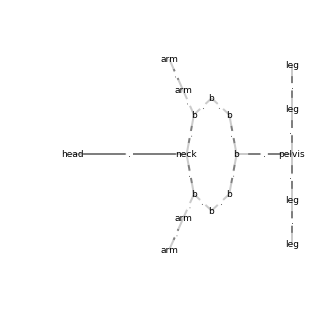

In [3]:
G=nx.Graph()
G.add_node(0, label='head')
G.add_node(1, label='neck')
G.add_node(11, label='b')
G.add_node(12, label='b')
G.add_node(13, label='b')
G.add_node(22, label='b')
G.add_node(23, label='b')
G.add_node(32, label='b')
G.add_node(33, label='b')
G.add_node(5, label='arm')
G.add_node(6, label='arm')
G.add_node(55, label='arm')
G.add_node(56, label='arm')
G.add_node(7, label='leg')
G.add_node(8, label='leg')
G.add_node(57, label='leg')
G.add_node(58, label='leg')
G.add_node(9, label='pelvis')
G.add_edge(0,1, label='.')
G.add_edge(1,22, label='.')
G.add_edge(1,23, label='.')
G.add_edge(9,11, label='.')
G.add_edge(11,12, label='.')
G.add_edge(11,13, label='.')
G.add_edge(12,32, label='.')
G.add_edge(13,33, label='.')
G.add_edge(22,32, label='.')
G.add_edge(23,33, label='.')
G.add_edge(9,7, label='.')
G.add_edge(9,8, label='.')
G.add_edge(22,5, label='.')
G.add_edge(23,6, label='.')
G.add_edge(5,55, label='.')
G.add_edge(6,56, label='.')
G.add_edge(7,57, label='.')
G.add_edge(8,58, label='.')


from eden.util import display
display.draw_graph(G, size=5, node_size=500, prog='circo')

g1 = G.copy()

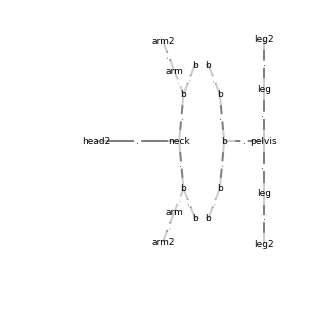

In [4]:
G=nx.Graph()
G.add_node(0, label='head2')
G.add_node(1, label='neck')
G.add_node(11, label='b')
G.add_node(12, label='b')
G.add_node(13, label='b')
G.add_node(22, label='b')
G.add_node(23, label='b')
G.add_node(32, label='b')
G.add_node(33, label='b')
G.add_node(42, label='b')
G.add_node(43, label='b')
G.add_node(5, label='arm')
G.add_node(6, label='arm')
G.add_node(55, label='arm2')
G.add_node(56, label='arm2')
G.add_node(7, label='leg')
G.add_node(8, label='leg')
G.add_node(57, label='leg2')
G.add_node(58, label='leg2')
G.add_node(9, label='pelvis')
G.add_edge(0,1, label='.')
G.add_edge(1,22, label='.')
G.add_edge(1,23, label='.')
G.add_edge(9,11, label='.')
G.add_edge(11,42, label='.')
G.add_edge(11,43, label='.')
G.add_edge(42,12, label='.')
G.add_edge(43,13, label='.')
G.add_edge(12,32, label='.')
G.add_edge(13,33, label='.')
G.add_edge(22,32, label='.')
G.add_edge(23,33, label='.')
G.add_edge(9,7, label='.')
G.add_edge(9,8, label='.')
G.add_edge(22,5, label='.')
G.add_edge(23,6, label='.')
G.add_edge(5,55, label='.')
G.add_edge(6,56, label='.')
G.add_edge(7,57, label='.')
G.add_edge(8,58, label='.')

from eden.util import display
display.draw_graph(G, size=5, node_size=500, prog='circo')

g2 = G.copy()

In [5]:
import sys
sys.path.append('..')
import graphlearn.utils.draw as myutils
import graphlearn.graphlearn as gl
from eden.converter.graph.gspan import gspan_to_eden
import itertools
gr = [g2,g1,g1,g1]

sampler=gl.GraphLearnSampler(radius_list=[0,1],thickness_list=[1])
sampler.fit(gr,n_jobs=-1, core_interface_pair_remove_threshold=1, interface_remove_threshold=1)

interface: 599301


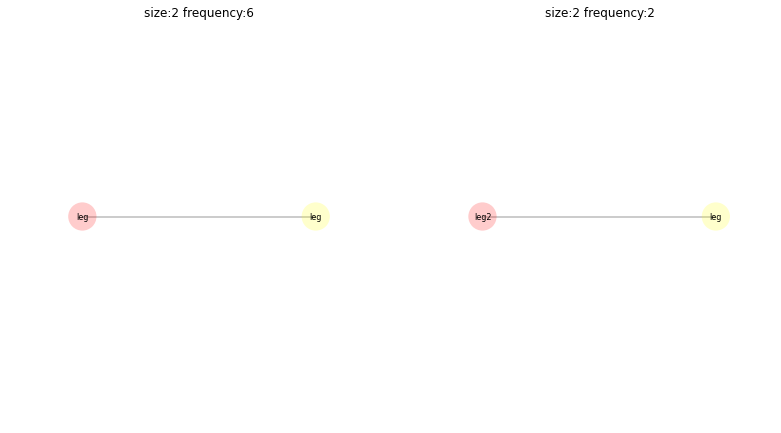

interface: 451723


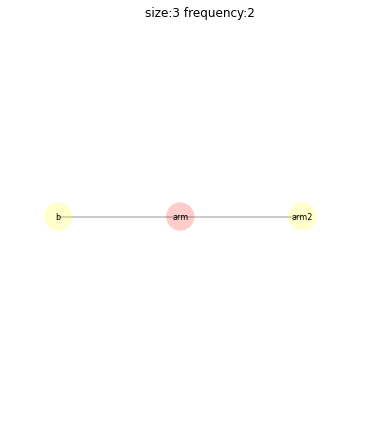

interface: 494093


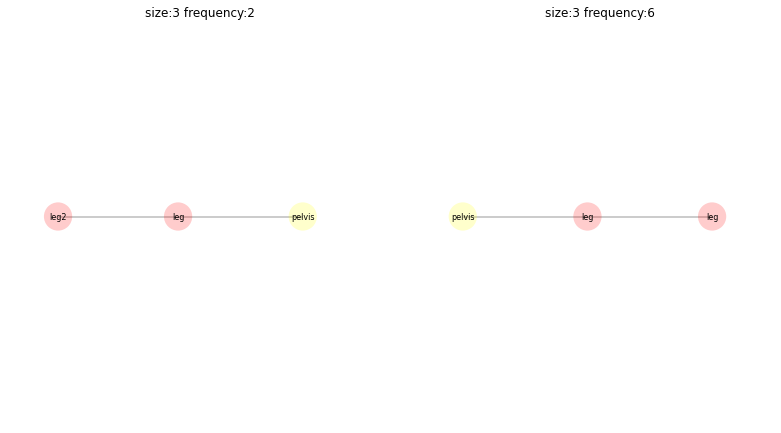

interface: 811023


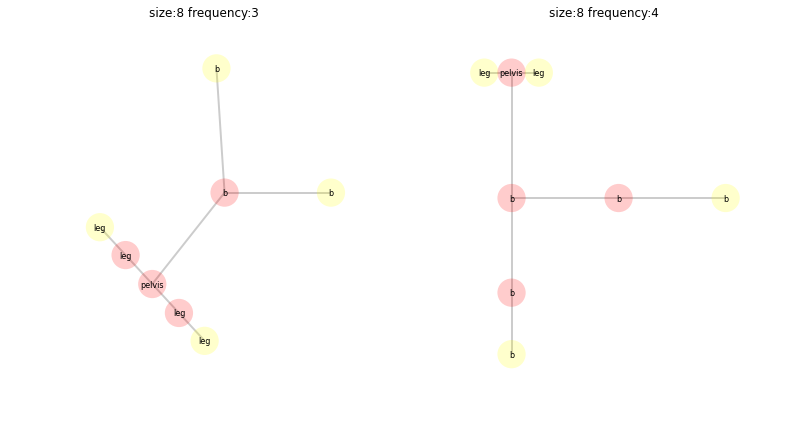

interface: 88366


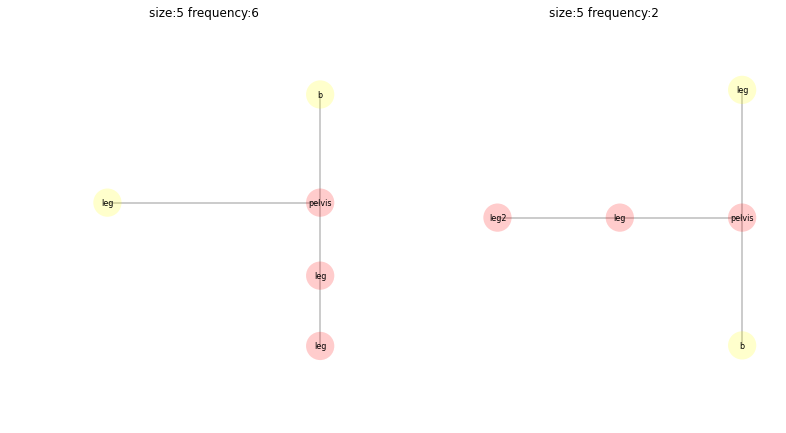

interface: 218373


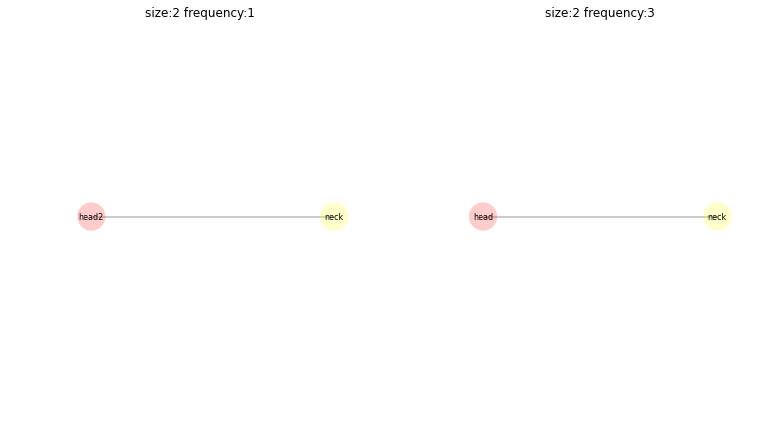

interface: 40737


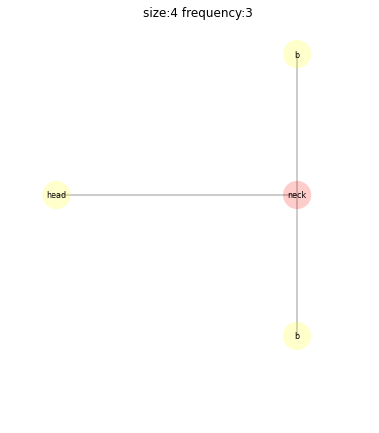

interface: 184359


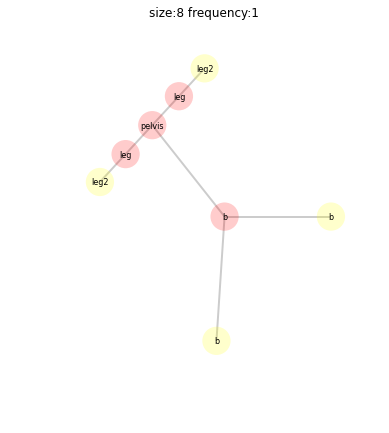

interface: 981678


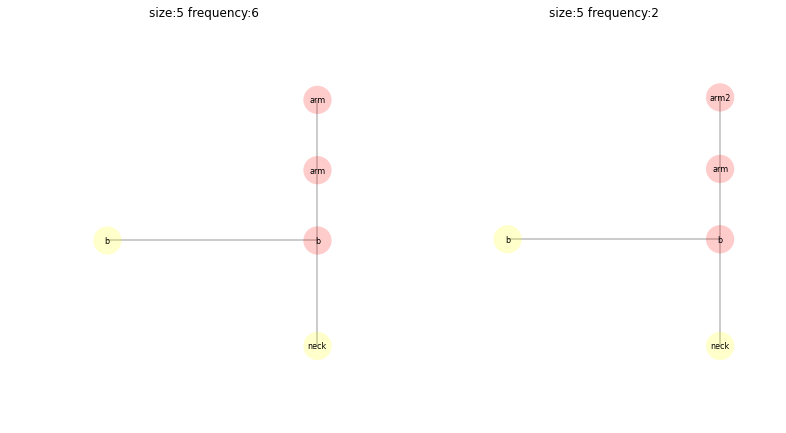

interface: 831536


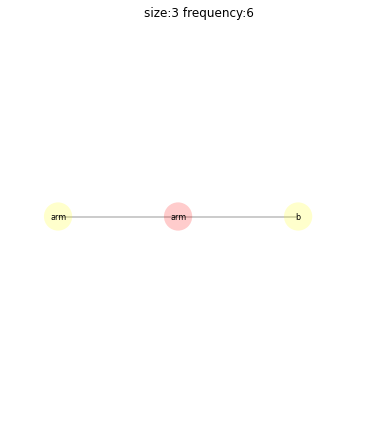

interface: 895673


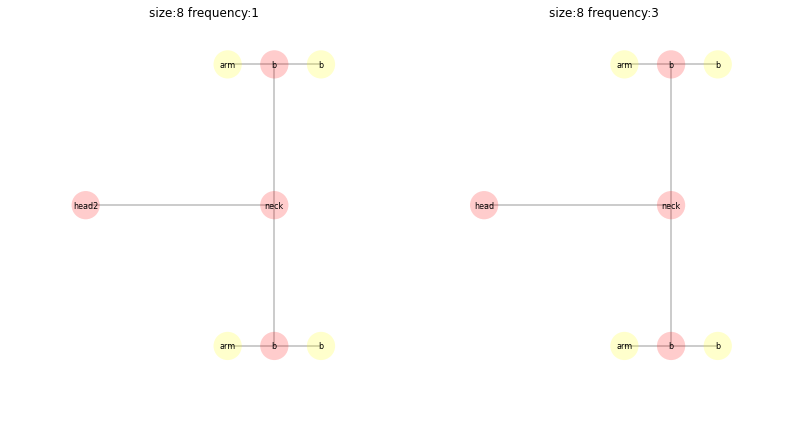

interface: 814034


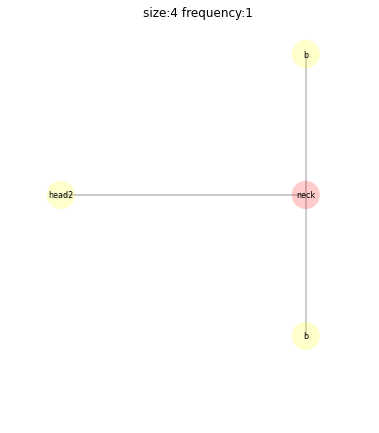

interface: 610133


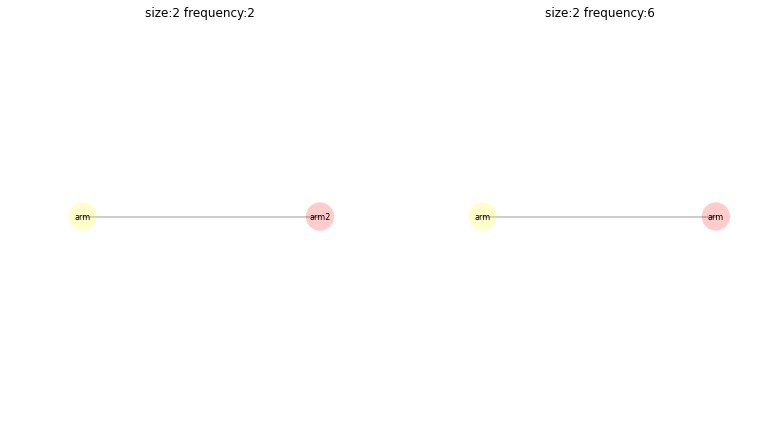

interface: 591446


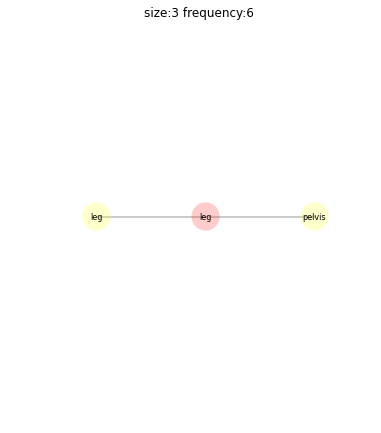

interface: 846430


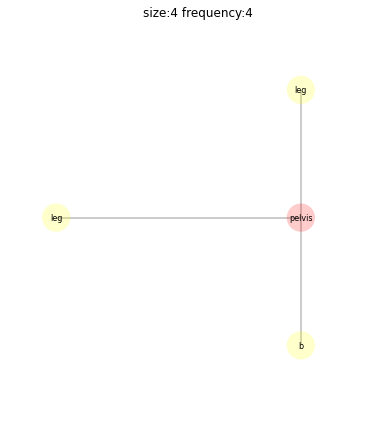

interface: 354787


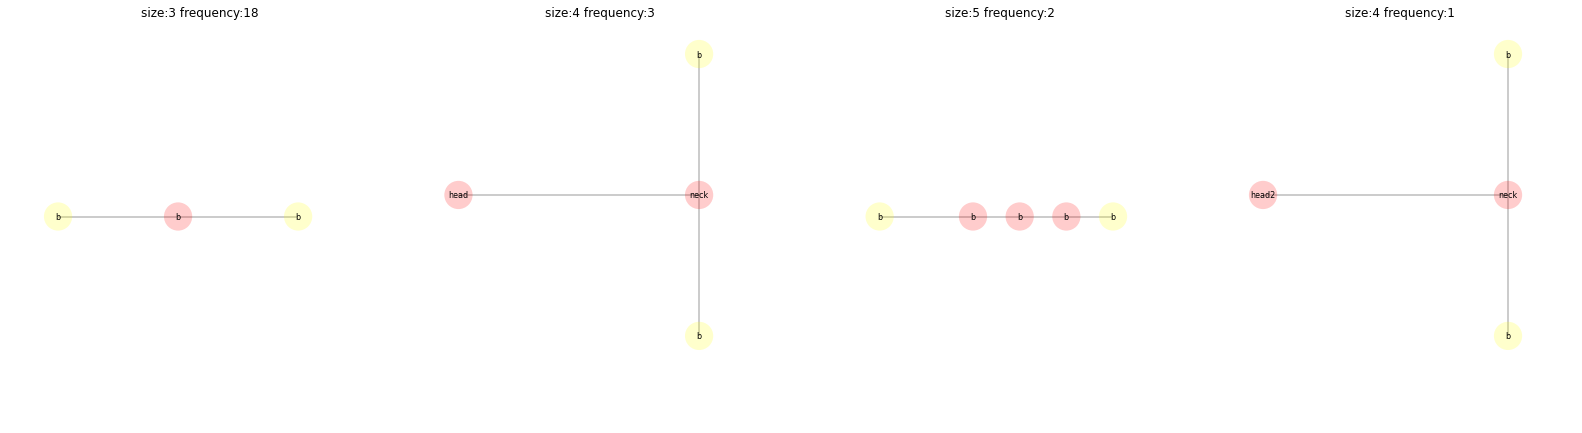

interface: 951146


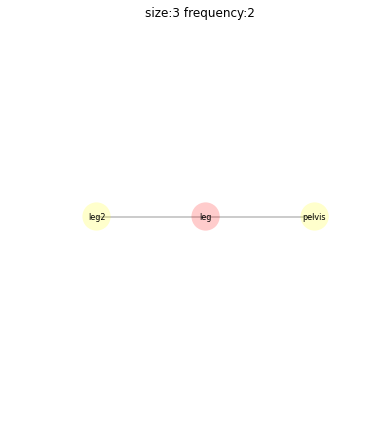

interface: 130795


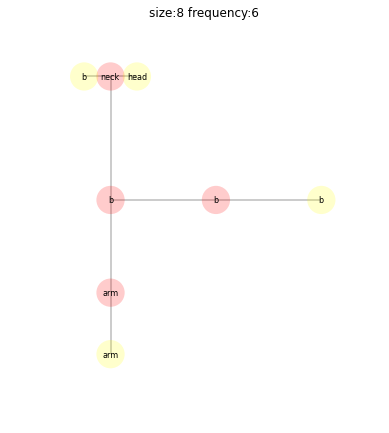

interface: 304632


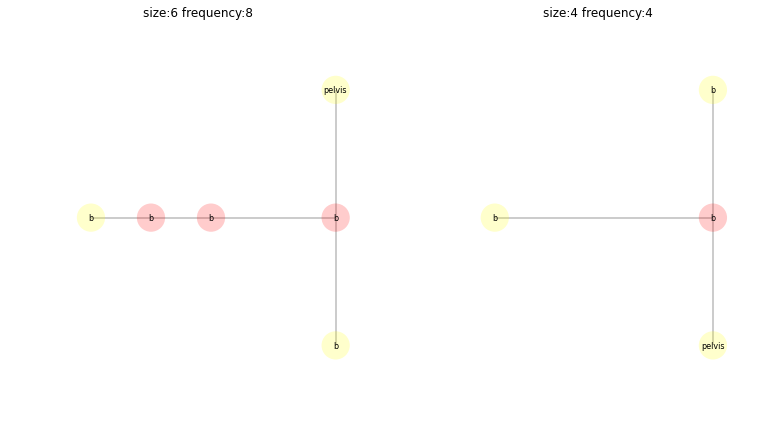

interface: 860409


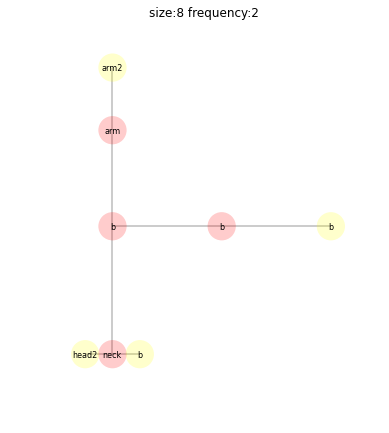

interface: 960890


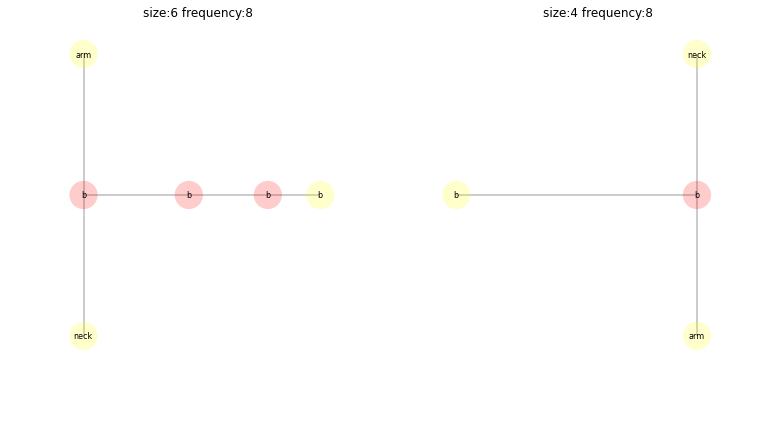

interface: 1041405


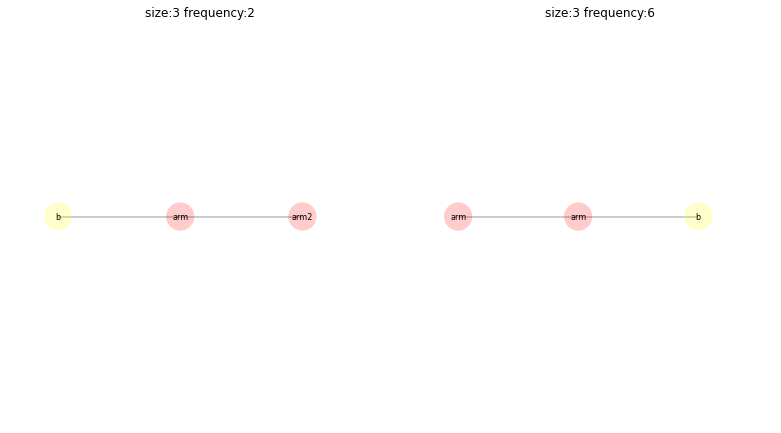

In [6]:
myutils.draw_grammar(sampler.local_substitutable_graph_grammar.grammar,n_productions=None,
                     n_graphs_per_line=7, size=7, 
                     colormap='autumn', invert_colormap=True, font_size=8,
                     vertex_alpha=0.2, edge_alpha=0.2, node_size=800,
                     prog='circo', size_x_to_y_ratio=3)

how often do we see interfacehashes
# productions: 36
x = # interfaces (total: 22)
y=numberofcores(ihash), y=sumOfCoreCounts(ihash)


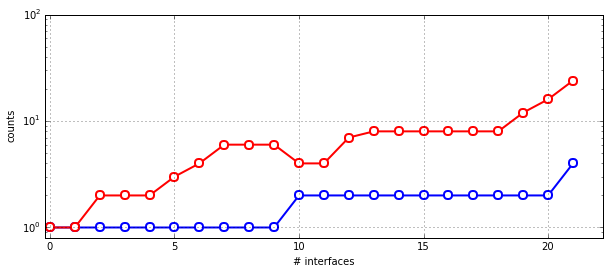

how often was this corehash seen?
x = # cores (total: 25)
y = inYinterfaces(chash), y= sumOfCountOverAllInterfaces(chash)


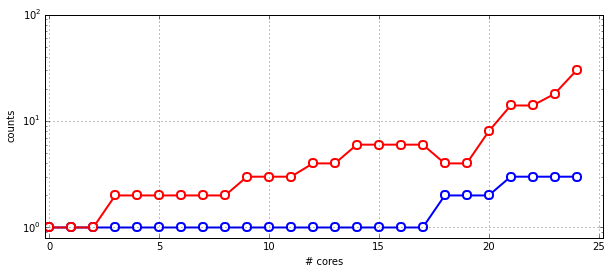

histogram
# productions: 36
distinct cores: 25 (seen on x axis)
interfaces with x many cores were observed y many times. 


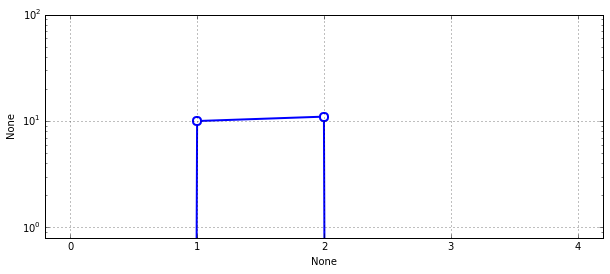

other histogram
how many cores exist with x many interfaces


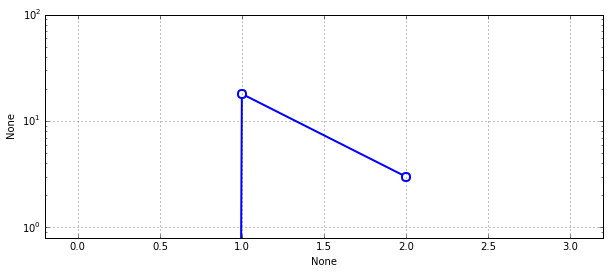

In [7]:
myutils.draw_grammar_stats(sampler.local_substitutable_graph_grammar.grammar)

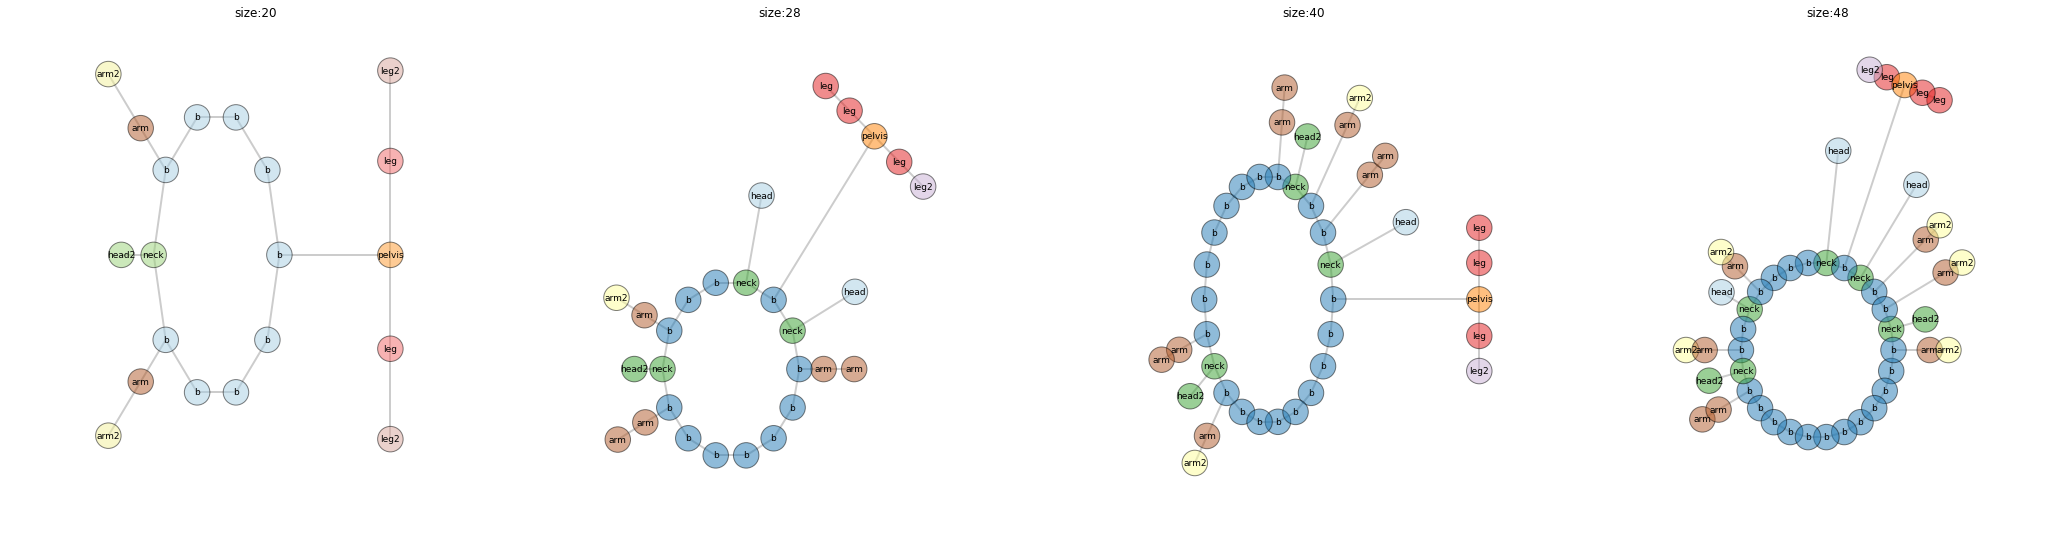

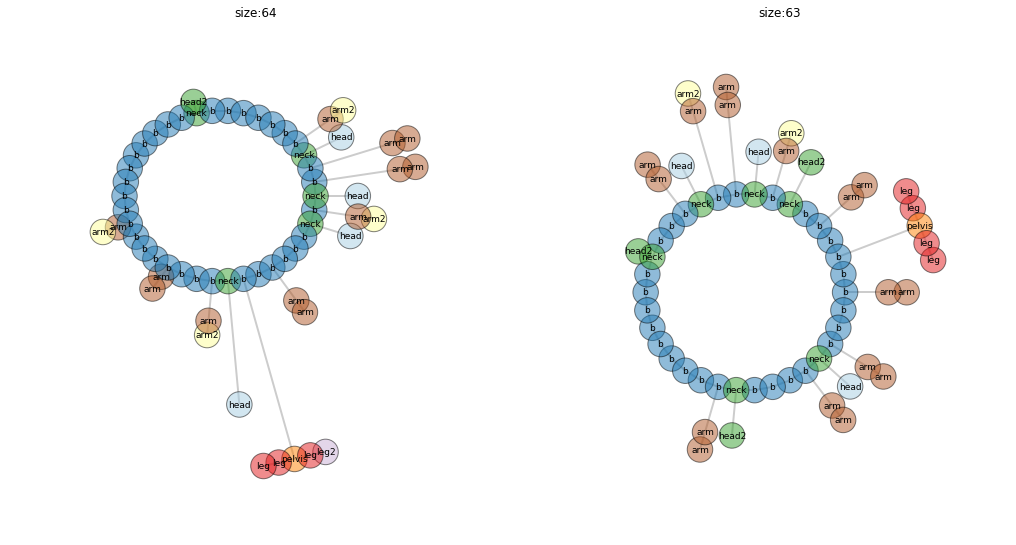

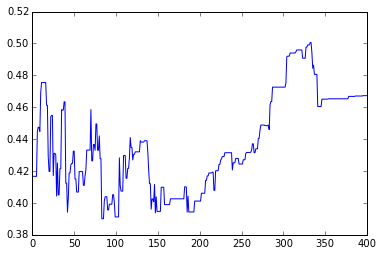

In [8]:
#sample
seed_graphs = [g2]
n_steps=400
sampling_interval=int(n_steps/6)+1
graphs = sampler.sample(seed_graphs,
                        same_radius=False,
                        same_core_size=False,
                        sampling_interval=sampling_interval,
                        probabilistic_core_choice=False,
                        batch_size=1,
                        n_steps=n_steps,
                        n_jobs=-1,
                        accept_annealing_factor=1.0)
#draw
import matplotlib.pyplot as plt
scores=[]
for graph in list(graphs):
    scores.append(graph.graph['sampling_info']['score_history'])
    path_graphs = graph.graph['sampling_info']['graphs_history']
    myutils.draw_graph_set(path_graphs,
                           n_graphs_per_line=4, size=9,
                           prog='circo',
                           colormap='Paired', invert_colormap=False,node_border=0.5, vertex_color='_labels_',
                           vertex_alpha=0.5, edge_alpha=0.2, node_size=650)
    
for h in scores: plt.plot(h)
plt.show()

###Question:
why does it not shrink the body?

Is it because there is no signal towards fewer body nodes? is it a problem of the normalization?